In [15]:
# Librerías
import pandas as pd
import os

# Ruta del archivo con los datos limpios
cleaned_data_filepath = '../data/processed/ai_stocks_historical_data_cleaned.parquet'

try:
    data_cleaned = pd.read_parquet(cleaned_data_filepath)
    print("\nDatos limpios usados en la exploración EDA")
    print(f"Rango de fechas de los datos cargados: {data_cleaned.index.min()} hasta {data_cleaned.index.max()}")
    print("\nPrimeras filas del DataFrame cargado:")
    print(data_cleaned.head())
except FileNotFoundError:
    print(f"\nERROR: Archivo no encontrado en la ruta especificada: {cleaned_data_filepath}")
    print("Verifica que el archivo .parquet fue copiado correctamente a la carpeta data/processed/ de este proyecto.")
except Exception as e:
    print(f"\nOcurrió un error al cargar el archivo: {e}")


Datos limpios usados en la exploración EDA
Rango de fechas de los datos cargados: 2015-04-20 00:00:00 hasta 2025-04-17 00:00:00

Primeras filas del DataFrame cargado:
Price           Close                                            High       \
Ticker           ARKQ BOTZ      GOOGL       MSFT      NVDA       ARKQ BOTZ   
Date                                                                         
2015-04-20  18.980328  NaN  27.096951  37.034481  0.532178  19.129559  NaN   
2015-04-21  19.008308  NaN  27.016832  36.801449  0.531456  19.026963  NaN   
2015-04-22  19.120234  NaN  27.328344  37.103531  0.537478  19.129561  NaN   
2015-04-23  19.259203  NaN  27.740372  37.405605  0.535310  19.260135  NaN   
2015-04-24  19.165934  NaN  28.546520  41.315315  0.530733  19.165934  NaN   

Price                                       ...       Open                  \
Ticker          GOOGL       MSFT      NVDA  ...       ARKQ BOTZ      GOOGL   
Date                                        ...    

## **Media Movil Simple**

In [17]:
# Librerías

import pandas as pd
import ta.trend
import ta.volatility
# La librería 'ta' opera sobre Series de Pandas (una columna a la vez)
# y devuelve una nueva Serie. Necesitas asignarla a una nueva columna en tu DataFrame.


tickers = data_cleaned.columns.get_level_values(1).unique() 

print("Calculando SMAs para cada ticker usando la librería 'ta'...")

# Iteraciones sobre cada ticker para calcular las SMAs
for ticker in tickers:
    # Seleccionamos la Serie 'Close' para el ticker actual
    close_series = data_cleaned[('Close', ticker)]

    # Calculamos la SMA de 20 períodos para esta Serie
    sma_20 = ta.trend.sma_indicator(close_series, window=20) 

    # Calculamos las SMAs opcionales de 50 y 100 períodos
    sma_50 = ta.trend.sma_indicator(close_series, window=50) # <-- ¡Corregido: window=50!
    sma_100 = ta.trend.sma_indicator(close_series, window=100) # <-- ¡Corregido: window=100!

    # Añade las Series calculadas de SMAs como nuevas columnas al DataFrame principal
    data_cleaned[('SMA_20', ticker)] = sma_20
    data_cleaned[('SMA_50', ticker)] = sma_50
    data_cleaned[('SMA_100', ticker)] = sma_100

print("SMAs añadidas a DataFrame.")

# --- Verificar el DataFrame ---
print("\nDataFrame con SMAs añadidas usando 'ta':")
print(data_cleaned.head())

print("\nÚltimas filas:")
print(data_cleaned.tail())

print("\nInformación del DataFrame:")
data_cleaned.info()

print("\nColumnas del DataFrame para verificar los nombres de las SMAs:")
# Esto imprimirá el MultiIndex de columnas completo, incluyendo las nuevas SMAs
print(data_cleaned.columns)

Calculando SMAs para cada ticker usando la librería 'ta'...
SMAs añadidas a DataFrame.

DataFrame con SMAs añadidas usando 'ta':
Price           Close                                            High       \
Ticker           ARKQ BOTZ      GOOGL       MSFT      NVDA       ARKQ BOTZ   
Date                                                                         
2015-04-20  18.980328  NaN  27.096951  37.034481  0.532178  19.129559  NaN   
2015-04-21  19.008308  NaN  27.016832  36.801449  0.531456  19.026963  NaN   
2015-04-22  19.120234  NaN  27.328344  37.103531  0.537478  19.129561  NaN   
2015-04-23  19.259203  NaN  27.740372  37.405605  0.535310  19.260135  NaN   
2015-04-24  19.165934  NaN  28.546520  41.315315  0.530733  19.165934  NaN   

Price                                       ... SMA_100 SMA_20 SMA_50 SMA_100  \
Ticker          GOOGL       MSFT      NVDA  ...    BOTZ  GOOGL  GOOGL   GOOGL   
Date                                        ...                                 
201

## **Visualizar Precio de Cierre y SMAs por Ticker**

Generando gráfico de Precio de Cierre y Medias Móviles para MSFT...


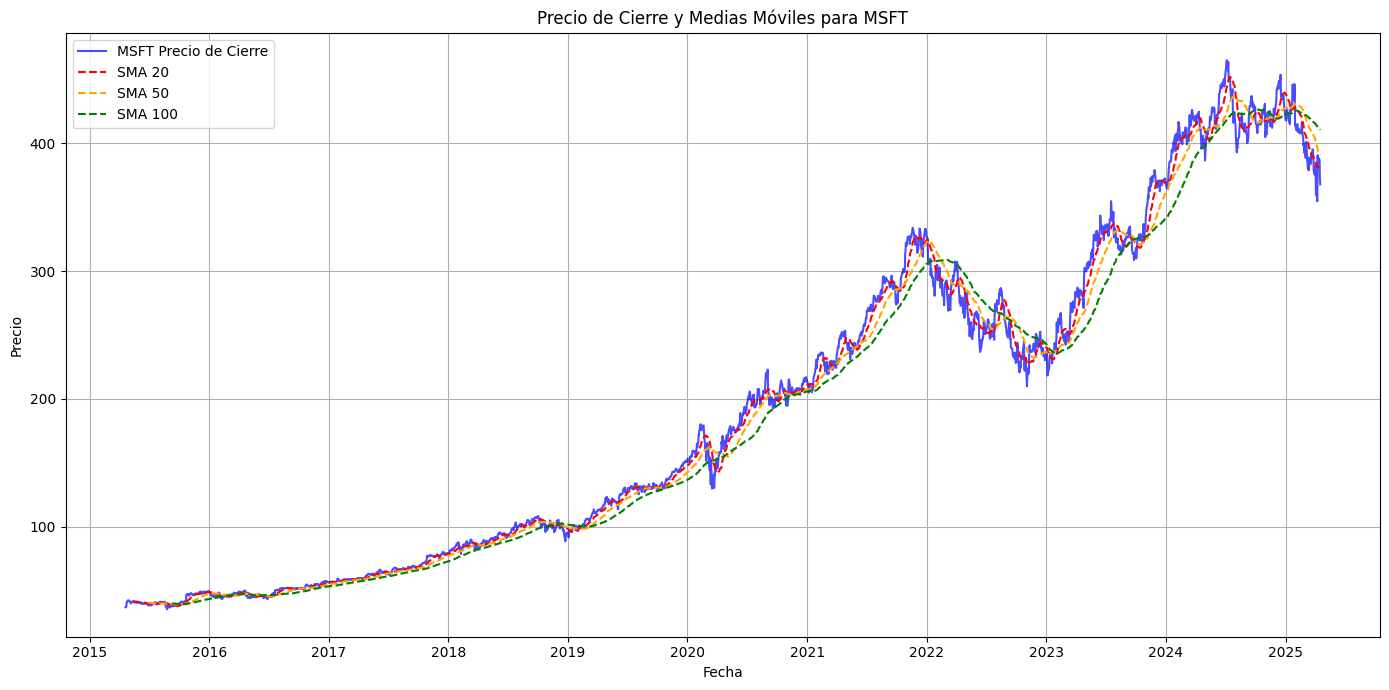

In [20]:
import matplotlib.pyplot as plt # Asegúrate de importar matplotlib

# Asegúrate de que data_cleaned esté cargado y las SMAs calculadas en celdas anteriores

# --- Selecciona un ticker para visualizar ---
ticker_to_plot = 'MSFT' # <-- CAMBIA esto al ticker que quieras graficar ('MSFT', 'GOOGL', 'BOTZ', 'ARKQ', etc.)

print(f"Generando gráfico de Precio de Cierre y Medias Móviles para {ticker_to_plot}...")

# --- Crear el gráfico ---
plt.figure(figsize=(14, 7)) # Ajusta el tamaño del gráfico si es necesario

# Grafica el precio de cierre para el ticker seleccionado
# Accede a la columna usando el MultiIndex: ('Close', Ticker)
price_data = data_cleaned[('Close', ticker_to_plot)]
plt.plot(price_data.index, price_data, label=f'{ticker_to_plot} Precio de Cierre', color='blue', alpha=0.7)

# Grafica las SMAs para el ticker seleccionado
# Accede a las columnas de SMA usando el MultiIndex: ('SMA_Length', Ticker)
try:
    # Intentar acceder a las columnas SMA que acabas de crear
    sma_20_data = data_cleaned[('SMA_20', ticker_to_plot)]
    sma_50_data = data_cleaned[('SMA_50', ticker_to_plot)]
    sma_100_data = data_cleaned[('SMA_100', ticker_to_plot)]

    # Grafica las Series de SMAs si los datos existen (no todos son NaN)
    # Usamos .dropna() para que la gráfica no muestre los NaNs iniciales
    plt.plot(sma_20_data.dropna().index, sma_20_data.dropna(), label='SMA 20', color='red', linestyle='--')
    plt.plot(sma_50_data.dropna().index, sma_50_data.dropna(), label='SMA 50', color='orange', linestyle='--')
    plt.plot(sma_100_data.dropna().index, sma_100_data.dropna(), label='SMA 100', color='green', linestyle='--')

except KeyError as e:
    print(f"Error al acceder a las columnas de SMA para {ticker_to_plot}: {e}.")
    print("Verifica que las columnas SMA existan y estén nombradas correctamente en data_cleaned.columns.")
    print("Columnas disponibles (primeros 100):", data_cleaned.columns[:100]) # Imprime solo las primeras 100 para no saturar


plt.title(f'Precio de Cierre y Medias Móviles para {ticker_to_plot}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend() # Muestra las etiquetas de cada línea
plt.grid(True) # Añade una rejilla
plt.tight_layout() # Ajusta el diseño para que no se solapen los elementos
plt.show()